In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV


from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Assuming X_train and X_test are your DataFrames with both numerical and non-numerical columns

# Select only numerical columns
#X_train = X_train.select_dtypes(include=[np.number])
#X_test = X_test.select_dtypes(include=[np.number])


In [3]:
# Create a simple linear regression model as a baseline
#baseline_model = LinearRegression()

# Train the model on the training data
#baseline_model.fit(X_train, y_train)

# Make predictions on the testing data
#y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print("Baseline Model Metrics:")
#print(f"Mean Squared Error (MSE): {mse:.2f}")
#print(f"R-squared (R2): {r2:.2f}")


> 

In [4]:
d1=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
d2=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

In [5]:
#Check for null values

In [6]:
null_count_d1 = d1.isnull().sum()

# Count null values in d2
null_count_d2 = d2.isnull().sum()

print("Null values count in d1:")
print(null_count_d1)

print("\nNull values count in d2:")
print(null_count_d2)

Null values count in d1:
VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

Null values count in d2:
VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
conges

In [7]:
d1.shape

(175000, 17)

In [8]:
d2.shape

(50000, 16)

In [9]:
# For d1 DataFrame
unique_values_d1_PULocationID = d1['PULocationID'].nunique()
unique_values_d1_DOLocationID = d1['DOLocationID'].nunique()

print(f"Unique values in 'PULocationID' in d1: {unique_values_d1_PULocationID}")
print(f"Unique values in 'DOLocationID' in d1: {unique_values_d1_DOLocationID}")

# For d2 DataFrame
unique_values_d2_PULocationID = d2['PULocationID'].nunique()
unique_values_d2_DOLocationID = d2['DOLocationID'].nunique()

print(f"Unique values in 'PULocationID' in d2: {unique_values_d2_PULocationID}")
print(f"Unique values in 'DOLocationID' in d2: {unique_values_d2_DOLocationID}")

Unique values in 'PULocationID' in d1: 264
Unique values in 'DOLocationID' in d1: 264
Unique values in 'PULocationID' in d2: 264
Unique values in 'DOLocationID' in d2: 264


In [10]:
# Drop the 'PULocationID' and 'DOLocationID' columns
d1 = d1.drop(columns=['PULocationID', 'DOLocationID'])
d2 = d2.drop(columns=['PULocationID', 'DOLocationID'])

#As there are 264 unique values, these two features are dropped

In [11]:
#Visualization to check the distribution of categorical features in the dataset

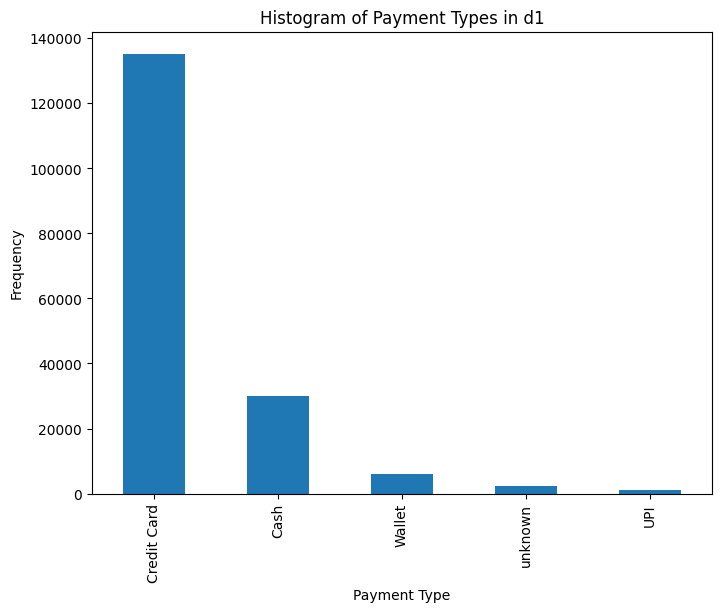

In [12]:
# Create a histogram for payment_type in d1
plt.figure(figsize=(8, 6))
d1['payment_type'].value_counts().plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Types in d1')
plt.show()

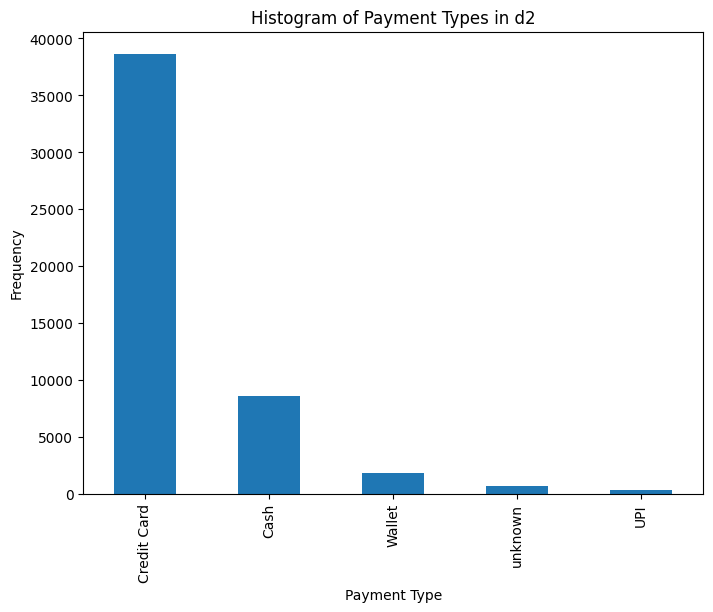

In [13]:
# Create a histogram for payment_type in d2
plt.figure(figsize=(8, 6))
d2['payment_type'].value_counts().plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Types in d2')
plt.show()

In [14]:
#There is a equal distribution in both training and testing set

In [15]:
# Find the maximum occurring value in the 'store_and_fwd_flag' column
max_occuring_value1 = d1['store_and_fwd_flag'].mode()[0]

# Fill null values with the maximum occurring value
d1['store_and_fwd_flag'].fillna(max_occuring_value1, inplace=True)


max_occuring_value2 = d2['store_and_fwd_flag'].mode()[0]

# Fill null values with the maximum occurring value
d2['store_and_fwd_flag'].fillna(max_occuring_value2, inplace=True)


In [16]:
unique_counts_d1 = d1['store_and_fwd_flag'].value_counts()
print("Unique value counts for store_and_fwd_flag in d1:")
print(unique_counts_d1)


Unique value counts for store_and_fwd_flag in d1:
store_and_fwd_flag
N    173806
Y      1194
Name: count, dtype: int64


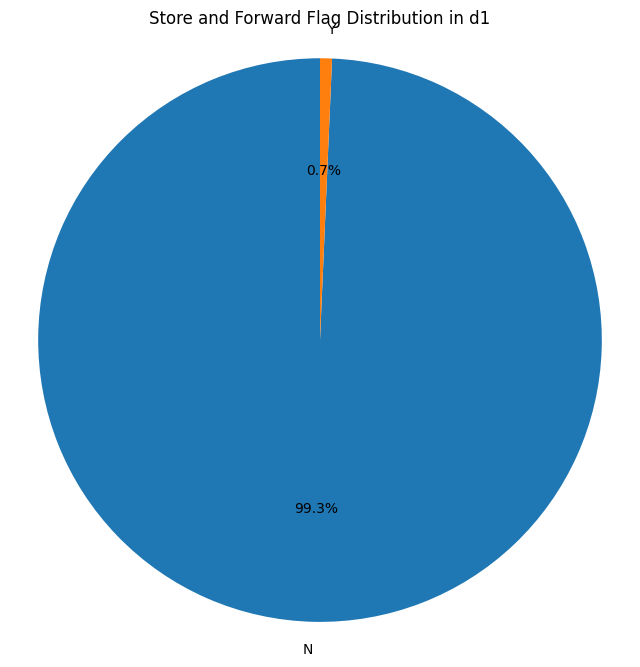

In [17]:

# Calculate value counts for store_and_fwd_flag in d1
counts_d1 = d1['store_and_fwd_flag'].value_counts()

# Create a pie chart for store_and_fwd_flag in d1
plt.figure(figsize=(8, 8))
plt.pie(counts_d1, labels=counts_d1.index, autopct='%1.1f%%', startangle=90)
plt.title('Store and Forward Flag Distribution in d1')
plt.axis('equal')
plt.show()

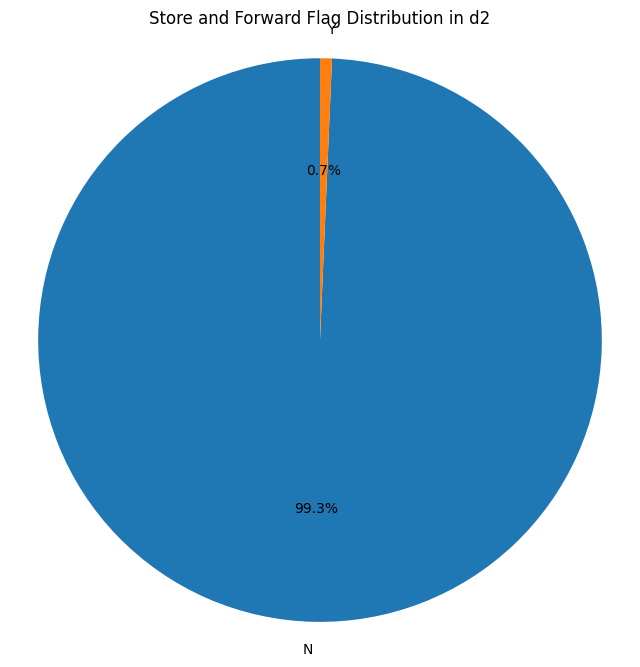

In [18]:
# Calculate value counts for store_and_fwd_flag in d2
counts_d2 = d2['store_and_fwd_flag'].value_counts()

# Create a pie chart for store_and_fwd_flag in d2
plt.figure(figsize=(8, 8))
plt.pie(counts_d2, labels=counts_d2.index, autopct='%1.1f%%', startangle=90)
plt.title('Store and Forward Flag Distribution in d2')
plt.axis('equal')
plt.show()

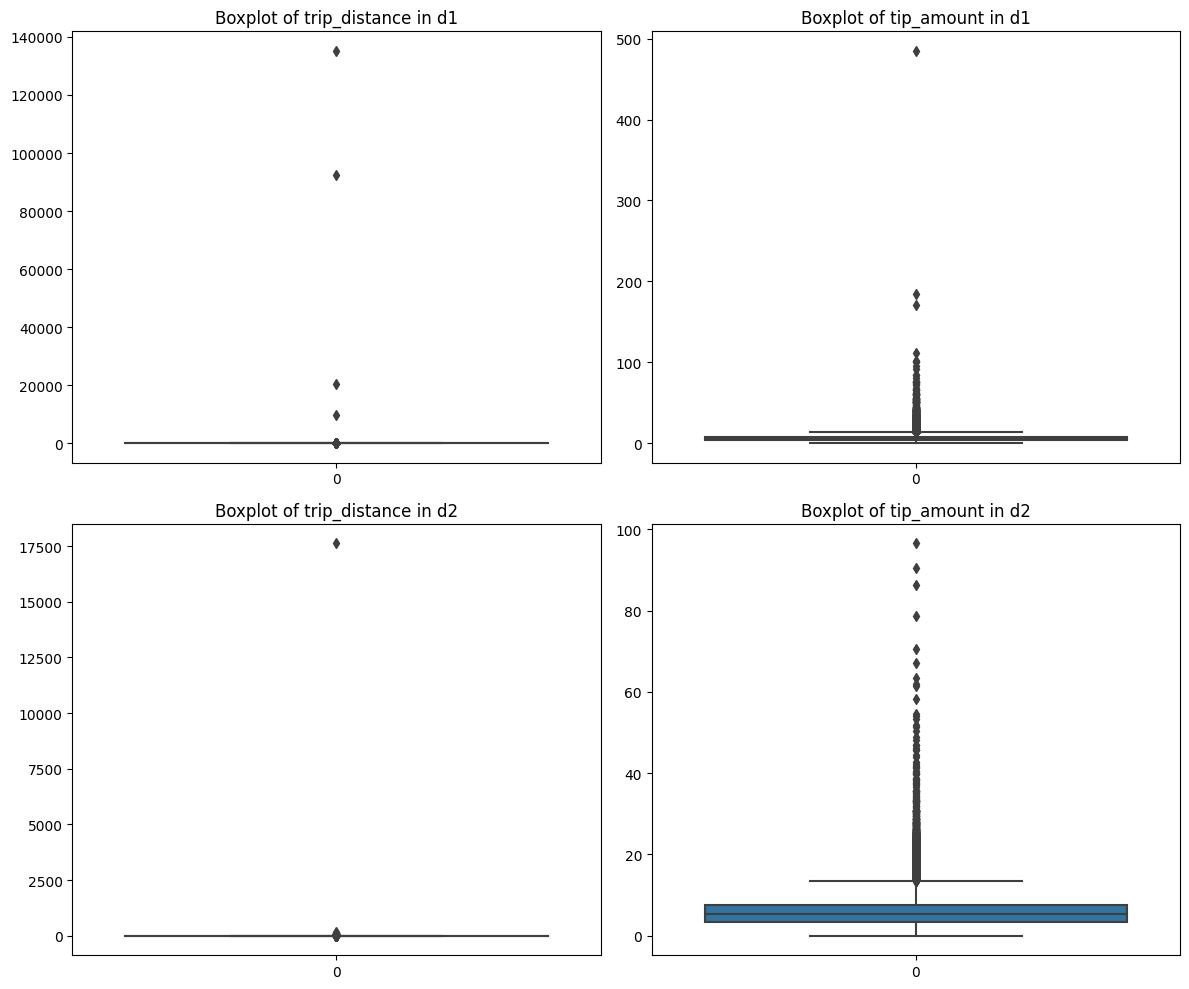

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for trip_distance in d1
sns.boxplot(data=d1['trip_distance'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of trip_distance in d1')

# Boxplot for trip_amount in d1
sns.boxplot(data=d1['tip_amount'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of tip_amount in d1')

# Boxplot for trip_distance in d2
sns.boxplot(data=d2['trip_distance'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of trip_distance in d2')

# Boxplot for trip_amount in d2
sns.boxplot(data=d2['tip_amount'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of tip_amount in d2')

plt.tight_layout()
plt.show()

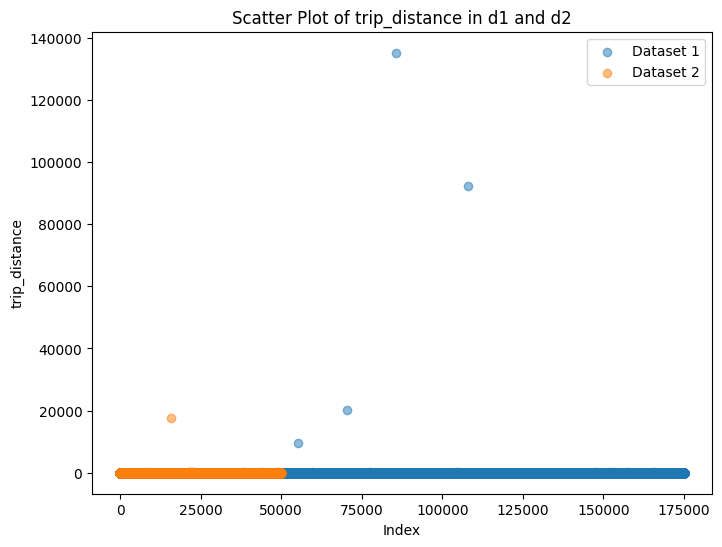

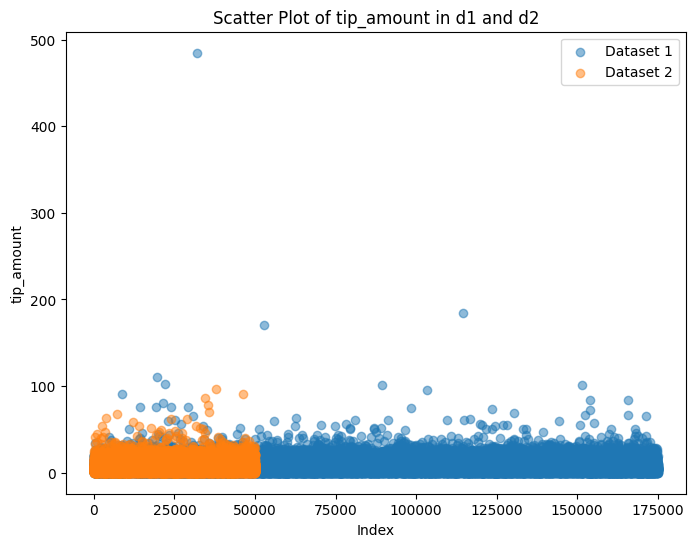

In [20]:
features = ['trip_distance', 'tip_amount']  # List of features to compare

for feature in features:
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for d1
    plt.scatter(d1.index, d1[feature], label='Dataset 1', alpha=0.5)
    
    # Scatter plot for d2
    plt.scatter(d2.index, d2[feature], label='Dataset 2', alpha=0.5)
    
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.title(f'Scatter Plot of {feature} in d1 and d2')
    plt.legend()
    plt.show()

In [21]:

# Concatenate both dataframes to create a combined set of unique values
combined_data = pd.concat([d1['store_and_fwd_flag'], d2['store_and_fwd_flag'], 
                           d1['payment_type'], d2['payment_type']])

# Extract unique values
unique_values = combined_data.unique()

# Create a label encoder using the unique values
label_encoder = LabelEncoder()
label_encoder.fit(unique_values)

# Perform label encoding for 'store_and_fwd_flag' and 'payment_type' columns in d1 and d2
d1['store_and_fwd_flag_encoded'] = label_encoder.transform(d1['store_and_fwd_flag'])
d1['payment_type_encoded'] = label_encoder.transform(d1['payment_type'])

d2['store_and_fwd_flag_encoded'] = label_encoder.transform(d2['store_and_fwd_flag'])
d2['payment_type_encoded'] = label_encoder.transform(d2['payment_type'])



In [22]:
#The resultant model was better when Label encoder was used than using a one hot encoder.

In [23]:

# Columns to encode
#columns_to_encode = ['store_and_fwd_flag', 'payment_type']

# Concatenate the relevant columns from both dataframes
#combined_data = pd.concat([d1[columns_to_encode], d2[columns_to_encode]])

# Perform one-hot encoding
#encoded_data = pd.get_dummies(combined_data, columns=columns_to_encode, drop_first=True)

# Get lengths of d1 and d2 for separation
#len_d1 = len(d1)

# Separate the encoded data back to d1 and d2
#d1_encoded = encoded_data.iloc[:len_d1]
#d2_encoded = encoded_data.iloc[len_d1:]

# Concatenate encoded data back to respective dataframes
#d1 = pd.concat([d1, d1_encoded], axis=1)
#d2 = pd.concat([d2, d2_encoded], axis=1)

# Drop the original columns in d1 and d2
#d1.drop(columns=columns_to_encode, inplace=True)
#d2.drop(columns=columns_to_encode, inplace=True)

In [24]:
# Assuming d1 and d2 are pandas DataFrames
d1 = d1.drop(columns=["payment_type", "store_and_fwd_flag"])
d2 = d2.drop(columns=["payment_type", "store_and_fwd_flag"])


In [25]:
#original columns are dropped.

In [26]:
#Feature creation

d1['travel_time'] = ((pd.to_datetime(d1['tpep_dropoff_datetime']) - pd.to_datetime(d1['tpep_pickup_datetime'])).dt.seconds) / 60
d1 = d1.drop(columns=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])

d2['travel_time'] = ((pd.to_datetime(d2['tpep_dropoff_datetime']) - pd.to_datetime(d2['tpep_pickup_datetime'])).dt.seconds) / 60
d2 = d2.drop(columns=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])

In [27]:
#Feature engineering done for calculating the travel time by using pandas to date time,
#by subtracting the pick up time from drop off time.

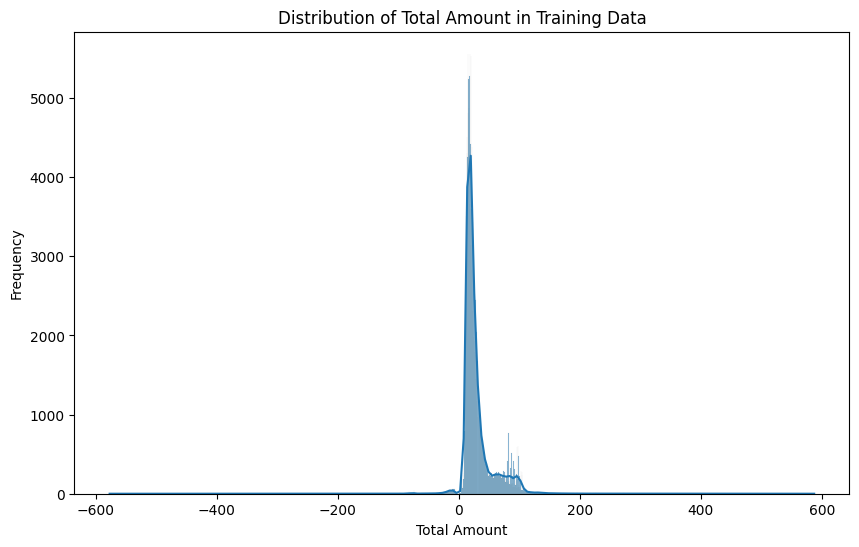

In [28]:
# Visualize the distribution of the target variable (total_amount) in the training data
plt.figure(figsize=(10, 6))
sns.histplot(d1['total_amount'], kde=True)
plt.title('Distribution of Total Amount in Training Data')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

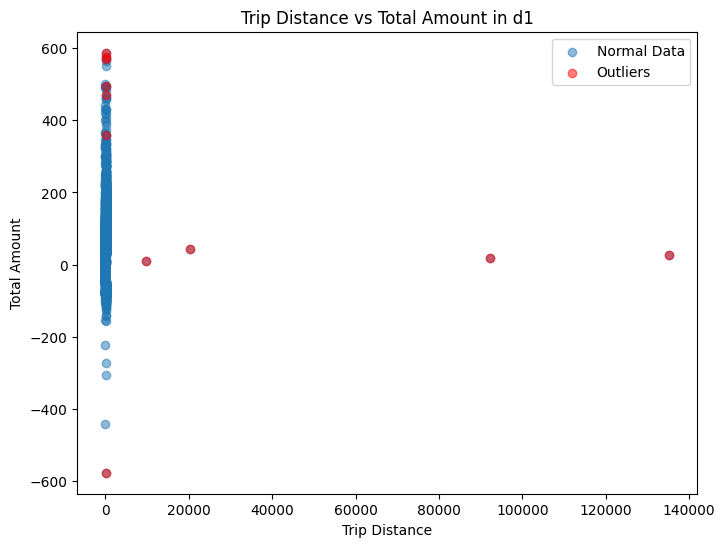

In [29]:
plt.figure(figsize=(8, 6))

# Scatter plot for normal data points
plt.scatter(d1['trip_distance'], d1['total_amount'], alpha=0.5, label='Normal Data')

# Threshold for outlier detection (adjust as needed)
trip_distance_threshold = 80  # Example threshold for trip distance outliers

# Identify outliers based on the threshold
outliers = d1[d1['trip_distance'] > trip_distance_threshold]

# Scatter plot for outliers (in a different color)
plt.scatter(outliers['trip_distance'], outliers['total_amount'], color='red', alpha=0.5, label='Outliers')

plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.title('Trip Distance vs Total Amount in d1')
plt.legend()
plt.show()

In [30]:
#80 km range is set as outlier threshold. Some outliers are having low total amount regardless of the trip distance

In [31]:

# Create a MinMaxScaler instance
scaler = RobustScaler()

# Specify the columns you want to scale
columns_to_scale = ['trip_distance', 'passenger_count','tip_amount']

# Fit and transform the selected columns
d1[columns_to_scale] = scaler.fit_transform(d1[columns_to_scale])

# Fit and transform the selected columns
d2[columns_to_scale] = scaler.fit_transform(d2[columns_to_scale])




In [32]:
#Robust scaling performed well cause the features had some outliers.  Minmax scaling was not the best for this data.

In [33]:
d1.columns
d2.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'store_and_fwd_flag_encoded',
       'payment_type_encoded', 'travel_time'],
      dtype='object')

In [34]:
# Define the columns to be scaled and imputed
#columns_to_scale = ['trip_distance', 'tip_amount','travel_time']
#columns_to_impute = ['passenger_count', 'congestion_surcharge', 'Airport_fee']

# Separate columns not involved in scaling or imputation
#remaining_columns = [col for col in d1.columns if col not in columns_to_scale + columns_to_impute]

#scaler = RobustScaler()
#imputer = SimpleImputer(strategy='mean')

#preprocessor = ColumnTransformer(
 #   transformers=[
  #      ('scaler', scaler, columns_to_scale),
   #     ('imputer', imputer, columns_to_impute)
    #],
    #remainder='passthrough'
#)

#pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform data using the pipeline
#data_transformed = pipeline.fit_transform(d1)

# Combine transformed columns with remaining columns
#transformed_columns_df = pd.DataFrame(data_transformed, columns=columns_to_scale + columns_to_impute + remaining_columns)
#d1 = transformed_columns_df.copy()  # Creating a new DataFrame 'd1' containing the transformed and remaining columns

In [35]:
# Define the columns to be scaled and imputed
#columns_to_scale = ['trip_distance','tip_amount','travel_time']
#columns_to_impute = ['passenger_count', 'congestion_surcharge', 'Airport_fee']

# Separate columns not involved in scaling or imputation
#remaining_columns = [col for col in d2.columns if col not in columns_to_scale + columns_to_impute]

#scaler = RobustScaler()
#imputer = SimpleImputer(strategy='mean')

#preprocessor = ColumnTransformer(
 #   transformers=[
  #      ('scaler', scaler, columns_to_scale),
   #     ('imputer', imputer, columns_to_impute)
    #],
    #remainder='passthrough'
#)

#pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform data using the pipeline
#data_transformed = pipeline.fit_transform(d2)

# Combine transformed columns with remaining columns
#transformed_columns_df = pd.DataFrame(data_transformed, columns=columns_to_scale + columns_to_impute + remaining_columns)
#d2 = transformed_columns_df.copy()  # Creating a new DataFrame 'd1' containing the transformed and remaining columns

In [36]:

# Define the columns you want to impute
columns_to_impute = ['passenger_count', 'congestion_surcharge', 'Airport_fee']

# Create separate imputers for each column
imputers = {}
for column in columns_to_impute:
    imputers[column] = SimpleImputer(strategy='mean')

# Fit and transform each imputer on the specified columns in both training and test data
for column in columns_to_impute:
    d1[column] = imputers[column].fit_transform(d1[[column]])
    d2[column] = imputers[column].transform(d2[[column]])


In [37]:
# Checking for null values in d1
null_values_d1 = d1.isnull().sum()
print("Null values in d1:\n", null_values_d1)

# Checking for null values in d2
null_values_d2 = d2.isnull().sum()
print("\nNull values in d2:\n", null_values_d2)


Null values in d1:
 VendorID                         0
passenger_count                  0
trip_distance                    0
RatecodeID                    6077
extra                            0
tip_amount                       0
tolls_amount                     0
improvement_surcharge            0
total_amount                     0
congestion_surcharge             0
Airport_fee                      0
store_and_fwd_flag_encoded       0
payment_type_encoded             0
travel_time                      0
dtype: int64

Null values in d2:
 VendorID                         0
passenger_count                  0
trip_distance                    0
RatecodeID                    1779
extra                            0
tip_amount                       0
tolls_amount                     0
improvement_surcharge            0
congestion_surcharge             0
Airport_fee                      0
store_and_fwd_flag_encoded       0
payment_type_encoded             0
travel_time                      0
d

In [38]:
# Separate features and target variable
X = d1.drop(columns=['total_amount'])  # Features
y = d1['total_amount']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (140000, 13)
Shape of X_test: (35000, 13)
Shape of y_train: (140000,)
Shape of y_test: (35000,)


In [39]:
# Assuming X_train is your DataFrame
mode_value = X_train['RatecodeID'].mode()[0]  # Calculate the mode (most frequent value)

# Fill null values with the mode
X_train['RatecodeID'].fillna(mode_value, inplace=True)

# Verify that null values have been filled
null_values1 = X_train['RatecodeID'].isnull().sum()
print(f"Number of null values in 'RatecodeID': {null_values1}")

X_test['RatecodeID'].fillna(mode_value, inplace=True)

# Verify that null values have been filled
null_values = X_test['RatecodeID'].isnull().sum()
print(f"Number of null values in 'RatecodeID': {null_values}")

Number of null values in 'RatecodeID': 0
Number of null values in 'RatecodeID': 0


In [40]:
#filled the null values with the maximum occuring values in the dataset.

R2 Score: 0.9574407286296649


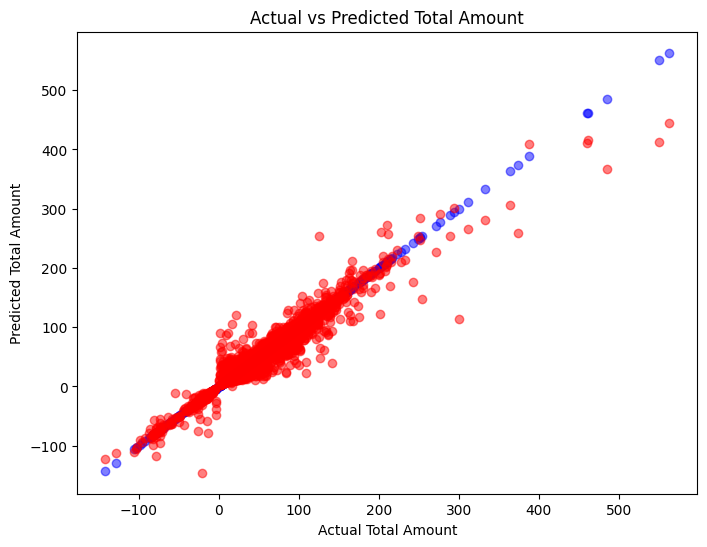

In [41]:
# Create and fit the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred1 = rf_regressor.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred1)
print("R2 Score:", r2)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values in red
plt.scatter(y_test, y_pred1, color='red', label='Predicted', alpha=0.5)

plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount')
plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 13
[LightGBM] [Info] Start training from score 29.665179
R2 Score: 0.9382913675312472


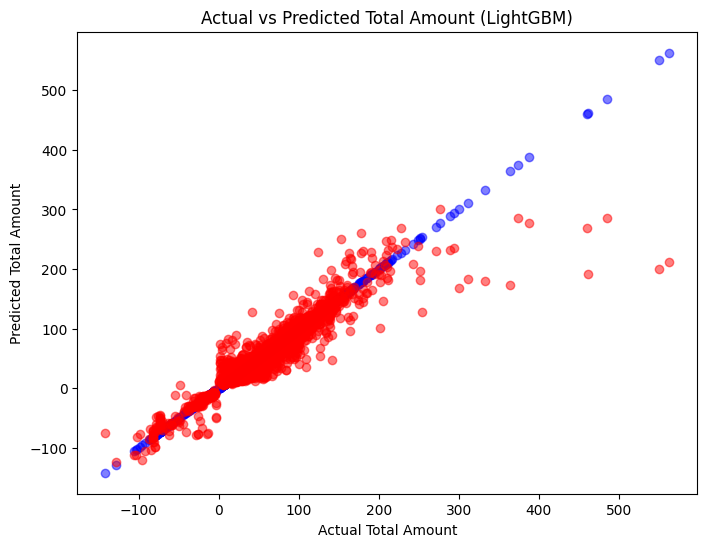

In [42]:
# Create a LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define the LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

# Train the LightGBM model
lgb_regressor = lgb.train(params, train_data, num_boost_round=100)

# Make predictions
y_pred2 = lgb_regressor.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred2)
print("R2 Score:", r2)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values in red
plt.scatter(y_test, y_pred2, color='red', label='Predicted', alpha=0.5)

plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount (LightGBM)')
plt.show()

R2 Score: 0.8699410287321181


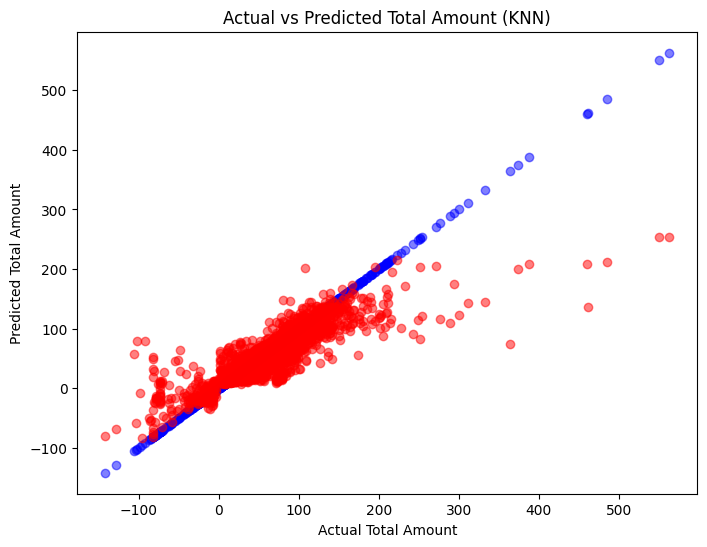

In [43]:
# Create and fit the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=11)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred3 = knn_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred3)
print("R2 Score:", r2)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values in red
plt.scatter(y_test, y_pred3, color='red', label='Predicted', alpha=0.5)

plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount (KNN)')
plt.show()

R2 Score: 0.9592538686110309


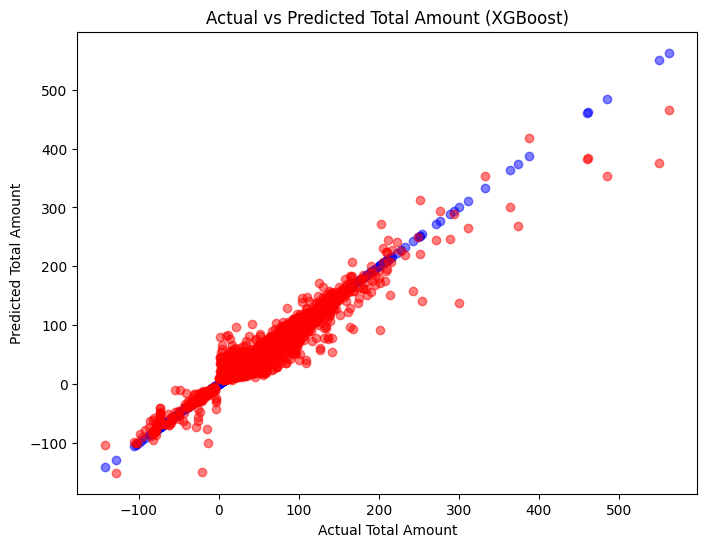

In [44]:
# Create and train the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred4 = xgb_regressor.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred4)
print("R2 Score:", r2)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values in red
plt.scatter(y_test, y_pred4, color='red', label='Predicted', alpha=0.5)

plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount (XGBoost)')
plt.show()

In [45]:
#From the above observations, it is evident that random forest regressor and XG boost are the optimal models for the dataset

 # Predicting for the original test set:

In [46]:
X_train = d1.drop('total_amount', axis=1)  # Features
y_train = d1['total_amount']  # Target variable
X_test = d2

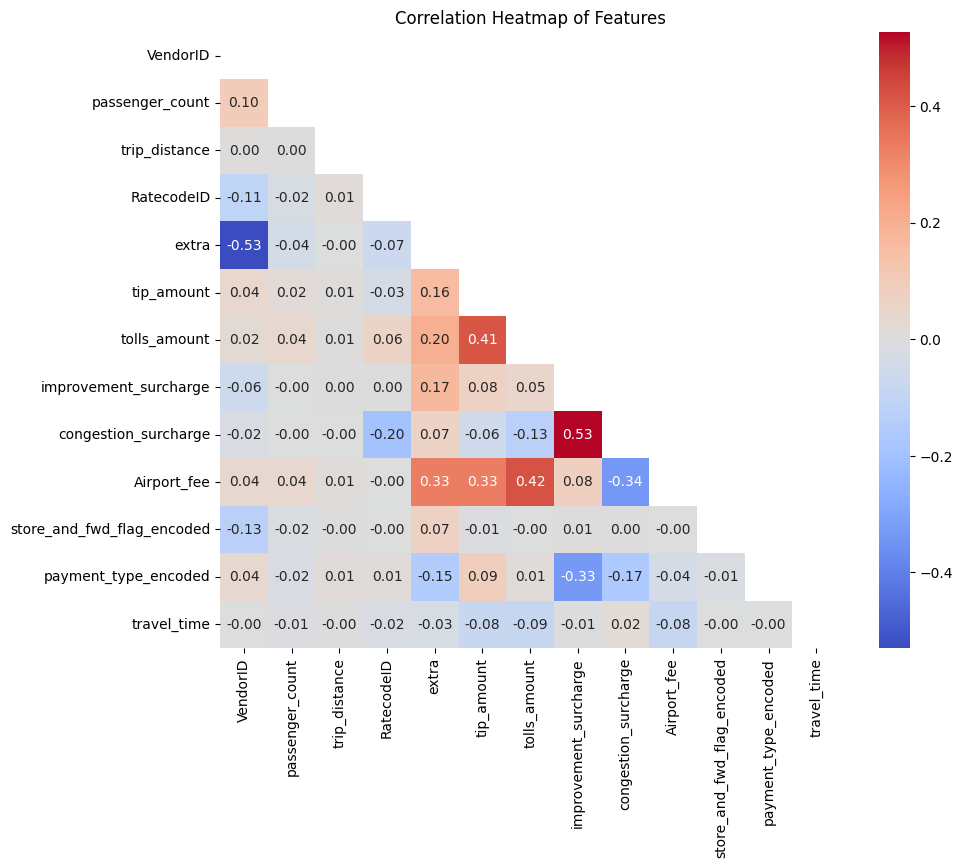

In [47]:
correlation_matrix = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Features')
plt.show()

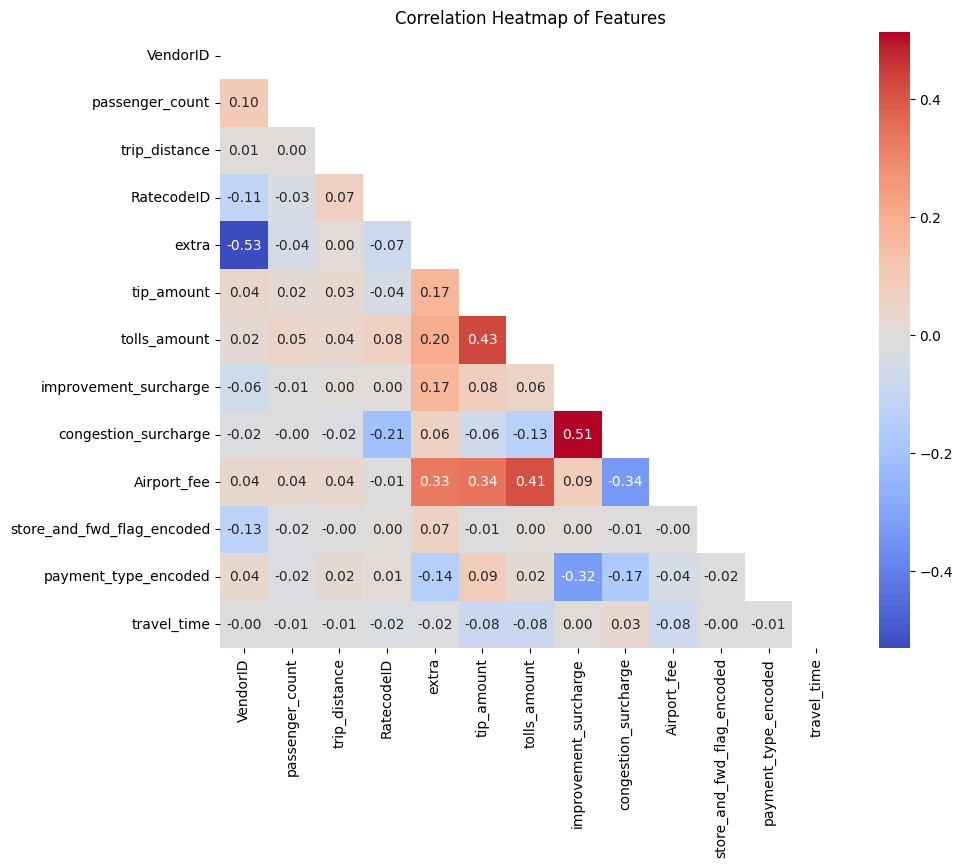

In [48]:
correlation_matrix = X_test.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Features')
plt.show()

Models and results

In [49]:
#desired_order = [
 #   'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'extra',
  #  'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
   # 'Airport_fee', 'store_and_fwd_flag_Y', 'payment_type_Credit Card', 'payment_type_UPI',
    #'payment_type_Wallet', 'payment_type_unknown', 'travel_time'
#]

# Reindex X_train and X_test to match the desired order
#X_train_reordered = X_train.reindex(columns=desired_order)
#X_test_reordered = X_test.reindex(columns=desired_order)

# Check if the columns are in the desired order
#print(X_train_reordered.columns)
#print(X_test_reordered.columns)

#X_train=X_train_reordered
#X_test=X_test_reordered

In [50]:
# Assuming X_train is your DataFrame
mode_value = X_train['RatecodeID'].mode()[0]  # Calculate the mode (most frequent value)

# Fill null values with the mode
X_train['RatecodeID'].fillna(mode_value, inplace=True)

# Verify that null values have been filled
null_values1 = X_train['RatecodeID'].isnull().sum()
print(f"Number of null values in 'RatecodeID': {null_values1}")

X_test['RatecodeID'].fillna(mode_value, inplace=True)

# Verify that null values have been filled
null_values = X_test['RatecodeID'].isnull().sum()
print(f"Number of null values in 'RatecodeID': {null_values}")

Number of null values in 'RatecodeID': 0
Number of null values in 'RatecodeID': 0


In [51]:
X_train.isnull().sum()

VendorID                      0
passenger_count               0
trip_distance                 0
RatecodeID                    0
extra                         0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
congestion_surcharge          0
Airport_fee                   0
store_and_fwd_flag_encoded    0
payment_type_encoded          0
travel_time                   0
dtype: int64

In [52]:
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the regressor to your data
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred1 = rf_regressor.predict(X_test)



In [53]:
train_data = lgb.Dataset(X_train, label=y_train)

# Define the LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

# Train the LightGBM model
lgb_regressor = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred2 = lgb_regressor.predict(X_test)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 13
[LightGBM] [Info] Start training from score 29.633901


In [54]:
# Define the LightGBM regressor
#lgb_regressor = lgb.LGBMRegressor()

# Define the grid of parameters to search
#param_grid = {
 #   'n_estimators': [100, 200, 300],
  #  'learning_rate': [0.3, 0.1, 0.2],
   # 'max_depth': [3, 6, 8]
#}

# Perform Grid Search Cross-Validation
#grid_search = GridSearchCV(estimator=lgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

# Use the best estimator for predictions
#best_lgb = grid_search.best_estimator_
#y_pred1 = best_lgb.predict(X_test)

In [55]:
#knn
knn_model = KNeighborsRegressor(n_neighbors=11)
knn_model.fit(X_train, y_train)
y_pred3 = knn_model.predict(X_test)

In [56]:
#Train the XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set using XGBoost
y_pred4 = xgb_regressor.predict(X_test)

In [57]:
#!pip install --upgrade numpy==1.22.0


In [58]:
submission_df1 = pd.DataFrame({'ID': range(1, len(y_pred1) + 1), 'total_amount': y_pred1})

# Save the DataFrame to a CSV file
submission_df1.to_csv('submission1.csv', index=False)


Random forest cut off score is 0.93915

In [59]:
submission_df2 = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})

# Save the DataFrame to a CSV file
submission_df2.to_csv('submission2.csv', index=False)


LGBM cut of score is 0.9116

In [60]:
submission_df3 = pd.DataFrame({'ID': range(1, len(y_pred3) + 1), 'total_amount': y_pred3})

# Save the DataFrame to a CSV file
submission_df3.to_csv('submission3.csv', index=False)


KNN cut off score is 0.83

In [61]:
submission_df4 = pd.DataFrame({'ID': range(1, len(y_pred4) + 1), 'total_amount': y_pred4})

# Save the DataFrame to a CSV file
submission_df4.to_csv('submission4.csv', index=False)


XG boost cut off score is 0.94561

In [62]:
# Initialize base models
#base_models = [
 #   ('ridge', Ridge()),
  #  ('knn', KNeighborsRegressor()),
   # ('random_forest', RandomForestRegressor()),
    #('xgboost', xgb.XGBRegressor()),
    #('lightgbm', lgb.LGBMRegressor())
#]

# Initialize the meta-model
#meta_model = LinearRegression()

# Create the stacking regressor
#stacking_reg = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [63]:
# Fit the stacking regressor
#stacking_reg.fit(X_train, y_train)

# Make predictions
#y_pred5 = stacking_reg.predict(X_test)

In [64]:
#submission_df5 = pd.DataFrame({'ID': range(1, len(y_pred5) + 1), 'total_amount': y_pred5})

# Save the DataFrame to a CSV file
#submission_df5.to_csv('submission5.csv', index=False)

Cut off score is 0.94